In [3]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

I just imported two libraries:

numpy the post popular Python library for array minipulation and numeric computing
matplotlib the most popular visualization library in the Python ecosystem

I wll now execute some code and generate some plots:

In [4]:
x = np.linspace(0,10,500)
y = np.cumsum(np.random.randn(500,6),0)

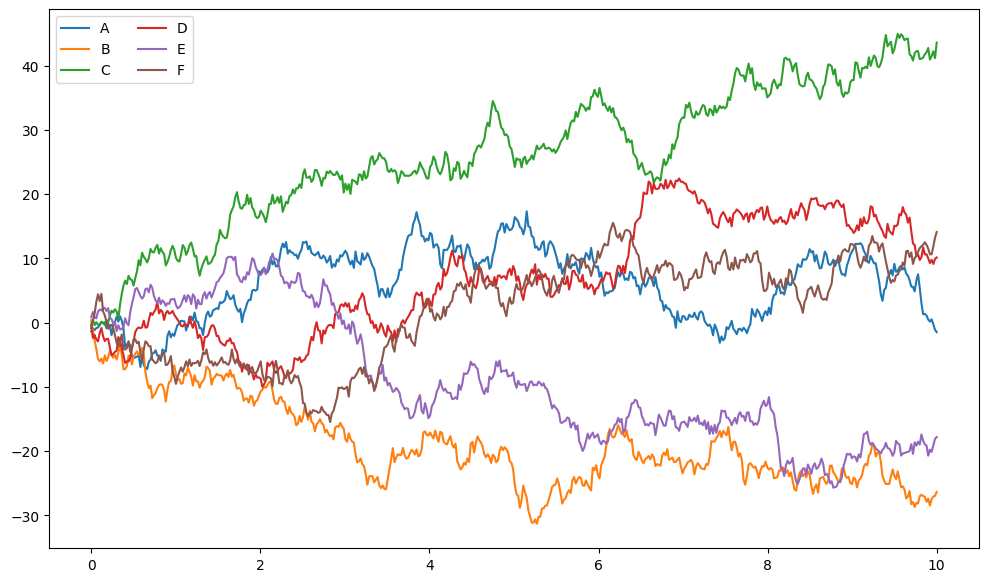

In [5]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol = 2, loc='upper left')

In this section, I will pull crytocurrency prices from a public API and download them as Excel files. To new libraries need to be imported in order to do this: requests and pandas

In [6]:
import requests
import pandas as pd

This is a simplified function to import data. It's from Cryptowatch. For reference, check their docs.

In [7]:
def get_historic_price(symbol, exchange='bitfinex', after ='2022-08-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns = [
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit ='s')
    df.set_index('CloseTime', inplace=True)
    return df


I will now pull data from Bitcoin and Ether, for the last 7 days:

In [8]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-08-28 18:43:36.100973')

In [9]:
btc = get_historic_price('btc','bitstamp', after = last_week)

In [10]:
eth = get_historic_price('eth','bitstamp', after = last_week)

Bitcoin:

In [11]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02
mean,20001.531792,20073.445087,19930.514451,20001.450867,60.323314,1.208413e+06
std,213.508524,219.063078,209.691568,213.816521,66.737423,1.336931e+06
min,19571.000000,19682.000000,19526.000000,19557.000000,4.940997,9.775217e+04
25%,19819.000000,19888.000000,19767.000000,19817.000000,17.241891,3.385395e+05
50%,19969.000000,20047.000000,19893.000000,19966.000000,35.303946,7.124597e+05
75%,20161.000000,20242.000000,20084.000000,20164.000000,70.865065,1.427482e+06
max,20465.000000,20575.000000,20389.000000,20470.000000,379.424199,7.595286e+06


In [12]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-08-28 19:00:00,19987,20036,19983,20017,9.347083,1.870375e+05
2022-08-28 20:00:00,20017,20072,19957,19973,21.725384,4.343671e+05
2022-08-28 21:00:00,19973,20053,19968,19994,30.819476,6.163815e+05
2022-08-28 22:00:00,20000,20055,19943,19979,26.682700,5.334801e+05
2022-08-28 23:00:00,19969,20025,19881,19901,62.905043,1.254012e+06


<AxesSubplot:xlabel='CloseTime'>

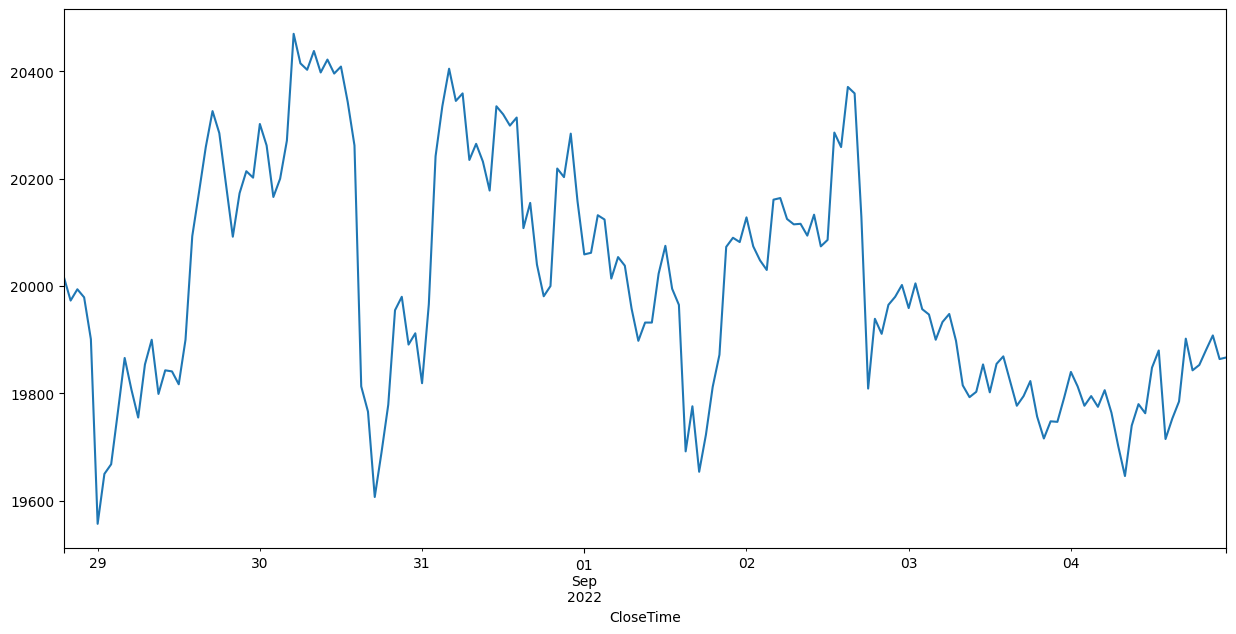

In [13]:
btc['ClosePrice'].plot(figsize=(15,7))

Ether:

In [14]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02
mean,1551.472832,1561.392486,1542.242197,1551.941040,489.811408,7.551530e+05
std,41.919954,41.702415,41.328608,41.601783,705.252080,1.077822e+06
min,1427.100000,1439.100000,1422.300000,1425.700000,26.473269,4.114305e+04
25%,1543.900000,1552.100000,1531.000000,1544.500000,102.136136,1.592473e+05
50%,1556.000000,1566.700000,1550.600000,1556.900000,237.526383,3.729016e+05
75%,1578.000000,1585.600000,1568.100000,1578.500000,508.797980,7.678667e+05
max,1639.400000,1649.100000,1631.100000,1639.200000,4530.750833,6.708999e+06


In [15]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-08-28 19:00:00,1483.1,1492.9,1483.1,1489.1,432.038137,643960.915177
2022-08-28 20:00:00,1490.0,1494.9,1482.0,1483.2,152.560279,226823.438327
2022-08-28 21:00:00,1483.1,1492.6,1482.4,1483.1,292.360832,434170.614443
2022-08-28 22:00:00,1483.2,1490.2,1471.3,1476.2,293.812733,435581.084388
2022-08-28 23:00:00,1473.8,1480.6,1462.0,1464.8,438.161948,644237.350787


<AxesSubplot:xlabel='CloseTime'>

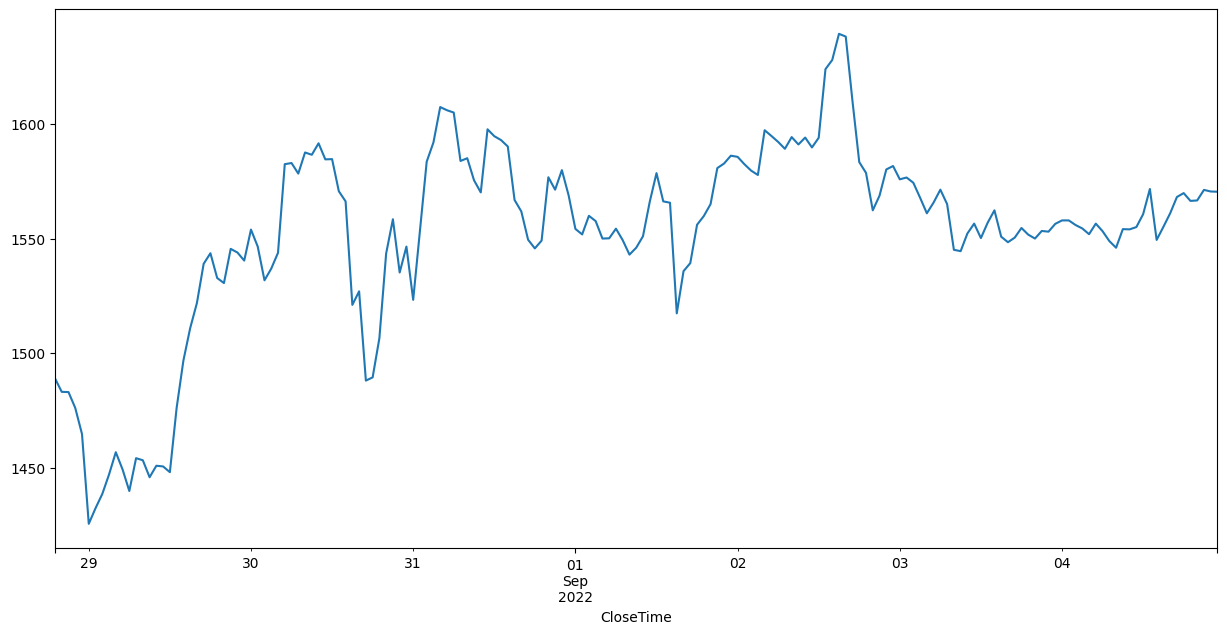

In [16]:
eth['ClosePrice'].plot(figsize=(15,7))

I've also included Bokeh as part of this main distribution. Bokeh is a plotting library that geerates interactive plots, that can be manipulated in the browser. 

First I have to import the Bokeh libraries (Bokeh was not easy to import. First I imported figure from bokeh.plotting and notebook for bokeh.io then, I modified my import statements to include output_file, show and output_notebook)

In [48]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [49]:
output_notebook()

Loading BokehJS ...

Now I will generate the plot:

In [50]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width =800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color= 'A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

Create an Excel file for the downloaded bitcoin prices using pandas. I had to pip install openpyxl

In [24]:
from openpyxl.workbook import Workbook

In [25]:
writer = pd.ExcelWriter('cryptos.xlsx')

The bitcoin and either data are loaded into the Excel file as two separate sheets

In [26]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [27]:
eth.to_excel(writer, sheet_name='Ether')


Save the Excel file

In [28]:
writer.save()